# How to input knowledge to the Machines (aka ) Machine learning ?!

# Learning Algorithms :

### A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P , if its performance at tasks in T , as measured by P improves with experience E.

#### (by Mitchell (1997))

### So what is E, T, P???





# Task T :
    * Classification
    * Regression
    * Transcription
    * Machine translation
    * Anomaly detection
    * Synthesis and sampling
    * Imputation of missing values
    * Denoising
            

# The Performance Measure P :
        * Accuracy
        * Precision, Recall
        * Reconstruction Error
        * RMSE ,MSE ,MAE

# The Experience E :

    * Supervised Learning p(y/x)
    * Unsupervised Learning p(x)
    * Reinforcement learning (continous learning)
    * Small line which separates Supervised from unsupervised learning (Arinthaal ... arinthaal....)

# Hint
### Generally ,The Best practice is to choose the Dataset/design matrix for your algorithm  in suchway that your model able to  see all possible combinations of examples (data points)

### What you want from Learning Algorithms !?
    * Generlization 

# What are all the learning Algorithms you know ?

### we will broadly classify the Algorithms into three parts : (for simplicity)
    * Statistical models
    * Linear Models
    * Tree based Models
    * Neural Networks

# Drawbacks of Linear Models 
    * Scaling is required 
    * Normalization is required
    * Encoding categorical varaibles is challenging 
    * Interpreting the results needs some addtional work
    * Implementing Multi class classification needs some extra thinking
    * Rest are Assignment !!!!

# DECISION TREE

![decsion tree](https://cdn-images-1.medium.com/max/1200/0*Yclq0kqMAwCQcIV_.jpg)

### Example of Decsion tree

https://en.akinator.com/game

![dt idea](IMG\dt_idea.PNG)

### think about how to get predictions ?

## So Which feature to Query and which threshold to choose !? how to write a generlized code for best split !???

![node purity](IMG/node_purity.PNG)

Consider the following example  to split red from green

![](IMG/Randomsplit.PNG)


# which one is good split !?
![](IMG/Randomsplit1.PNG)

![](IMG/Randomsplit2.PNG)

## The Basic Algorithm
    1 Start at the root node as parent node
    2 Split the parent node at the feature xi to minimize the sum of the child node impurities (maximize information gain)
    3 Assign training samples to new child nodes
    4 Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node
    
    
## Stopping Rules
    1 The leaf nodes are pure
    2 A maximal node depth is reached
    3 Splitting a note does not lead to an information gain

# Talking about what to reduce (i.e how impurity has to be reduced) we have following measurements 
    * Gini index
    * Entropy
    * Misclassification Error
    * ID3
    * Chi-Square
    * Reduction in Variance
### Reference :
    https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134

    https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php
    https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

## Information gain
![](https://sebastianraschka.com/images/faq/decisiontree-error-vs-entropy/ig.png)
![](https://sebastianraschka.com/images/faq/decisiontree-error-vs-entropy/ig_xp.png)

## Gini index :
    Gini index (a criterion to minimize the probability of misclassification)
Gini =$1-\sum_jp_j^2$

where $p_j$ is the probability of class j.

![](IMG/gini_impurity_exp1.PNG)

![](IMG/gini_impurity_exp2.PNG)

### More Generalized Form

![](IMG/gini_impurity_exp_form.PNG)

## Entropy :
    * Way to measure impurity
    * calculates the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one

Entropy = $-\sum_jp_j\log_2p_j$

##### Example :
entropy = $-1 \log_2 1 = 0$

entropy = $-0.5 \log_2 0.5 - 0.5 \log_2 0.5  = 1$

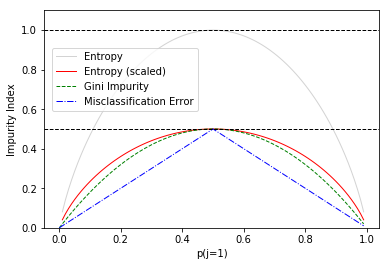

In [10]:
#https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

In [1]:
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["color", "diameter", "label"]


def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

#######
# Demo:
# unique_vals(training_data, 0)
# unique_vals(training_data, 1)
#######


def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

#######
# Demo:
# class_counts(training_data)
#######


def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

#######
# Demo:
# is_numeric(7)
# is_numeric("Red")
#######


class Question:
    """A Question is used to partition a dataset.
    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

#######
# Demo:
# Let's write a question for a numeric attribute
# Question(1, 3)
# How about one for a categorical attribute
# q = Question(0, 'Green')
# Let's pick an example from the training set...
# example = training_data[0]
# ... and see if it matches the question
# q.match(example)
#######


def partition(rows, question):
    """Partitions a dataset.
    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


#######
# Demo:
# Let's partition the training data based on whether rows are Red.
# true_rows, false_rows = partition(training_data, Question(0, 'Red'))
# This will contain all the 'Red' rows.
# true_rows
# This will contain everything else.
# false_rows
#######

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
# no_mixing = [['Apple'],
#              ['Apple']]
# this will return 0
# gini(no_mixing)
#
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
# some_mixing = [['Apple'],
#               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
# gini(some_mixing)
#
# Now, we'll look at a dataset with many different labels
# lots_of_mixing = [['Apple'],
#                  ['Orange'],
#                  ['Grape'],
#                  ['Grapefruit'],
#                  ['Blueberry']]
# This will return 0.8
# gini(lots_of_mixing)
#######

def info_gain(left, right, current_uncertainty):
    """Information Gain.
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

#######
# Demo:
# Calculate the uncertainy of our training data.
# current_uncertainty = gini(training_data)
#
# How much information do we gain by partioning on 'Green'?
# true_rows, false_rows = partition(training_data, Question(0, 'Green'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# What about if we partioned on 'Red' instead?
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# It looks like we learned more using 'Red' (0.37), than 'Green' (0.14).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
#
# Here, the true_rows contain only 'Grapes'.
# true_rows
#
# And the false rows contain two types of fruit. Not too bad.
# false_rows
#
# On the other hand, partitioning by Green doesn't help so much.
# true_rows, false_rows = partition(training_data, Question(0,'Green'))
#
# We've isolated one apple in the true rows.
# true_rows
#
# But, the false-rows are badly mixed up.
# false_rows
#######


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

#######
# Demo:
# Find the best question to ask first for our toy dataset.
# best_gain, best_question = find_best_split(training_data)
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

class Leaf:
    """A Leaf node classifies data.
    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)


class Decision_Node:
    """A Decision Node asks a question.
    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


def build_tree(rows):
    """Builds the tree.
    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
# my_tree = build_tree(training_data)
# classify(training_data[0], my_tree)
#######

def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


#######
# Demo:
# Printing that a bit nicer
# print_leaf(classify(training_data[0], my_tree))
#######

#######
# Demo:
# On the second example, the confidence is lower
# print_leaf(classify(training_data[1], my_tree))
#######



In [19]:
my_tree = build_tree(training_data)

print_tree(my_tree)

# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}
Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X,y=load_diabetes(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.shape,y_train.shape

((331, 10), (331,))

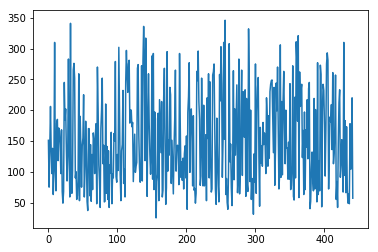

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(y)
plt.show()

In [6]:
dtr=DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

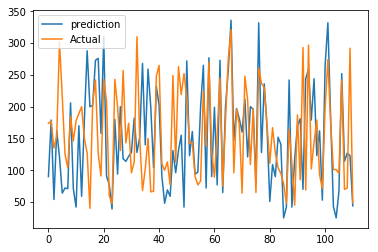

In [8]:
pred=dtr.predict(X_test)
plt.plot(pred,label='prediction')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

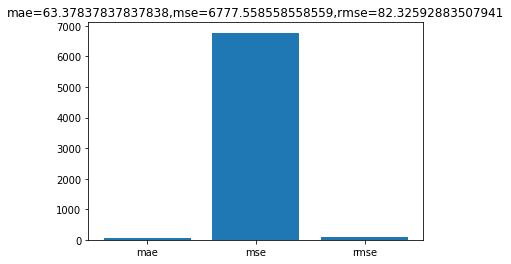

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
rmse=mse**0.5
plt.bar(['mae','mse','rmse'],[mae,mse,rmse])
plt.title('mae={},mse={},rmse={}'.format(mae,mse,rmse))
plt.show()


In [1]:
!pip install pydotplus

In [11]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions=ti.predict(dtr,X_test)

In [10]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image,HTML,SVG

from io import StringIO
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [12]:
import os
import sys
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

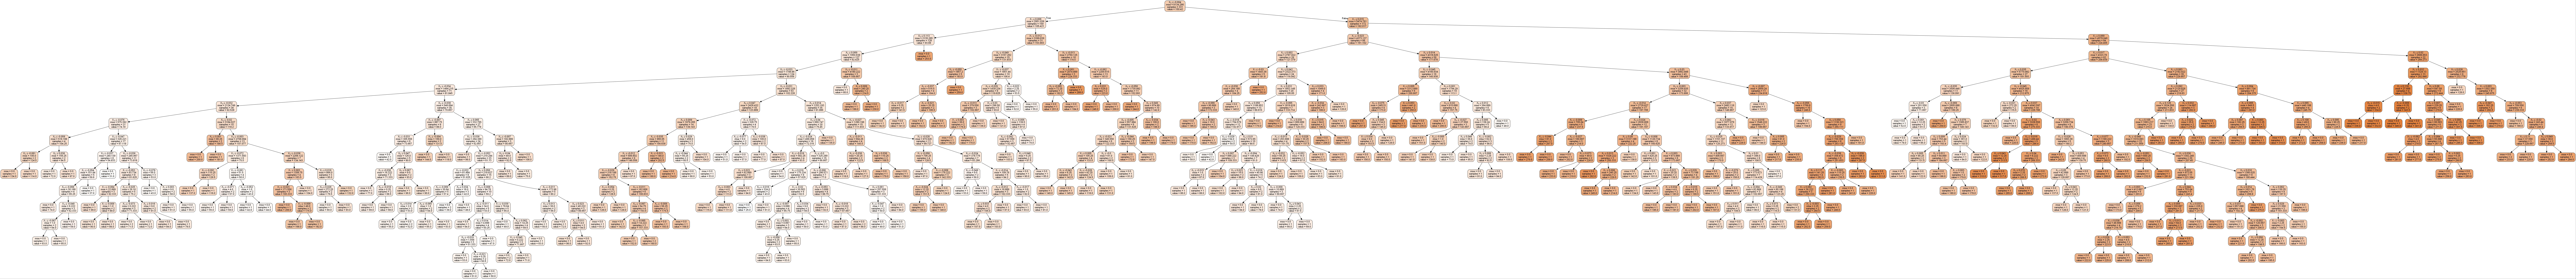

In [14]:
conda_fix(graph)
Image(graph.create_jpg())

# Advantages of Tree based Models :
    * Easy categorical Handling 
    * interpreting the results are easy 
    * No scaling /Normalization are required
    * Rest are Assignment !!!
    